# Реальные данные

### Предварительный анализ

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('GAZP_150111_220111.csv', sep=';')
df2 = pd.read_csv('LKOH_150111_220111.csv', sep=';')
df3 = pd.read_csv('MTSS_150111_220111.csv', sep=';')
df4 = pd.read_csv('FIVE_150111_220111.csv', sep=';')
df5 = pd.read_csv('ROSB_150111_220111.csv', sep=';')
df6 = pd.read_csv('ROSN_150111_220111.csv', sep=';')
df7 = pd.read_csv('SBER_150111_220111.csv', sep=';')
df8 = pd.read_csv('DSKY_150111_220111.csv', sep=';')
df9 = pd.read_csv('POLY_150111_220111.csv', sep=';')

In [3]:
df1.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20150112,00:00:00,140.22,25286750
1,GAZP,D,20150113,00:00:00,142.64,32912570
2,GAZP,D,20150114,00:00:00,146.30,37809840
3,GAZP,D,20150115,00:00:00,147.00,32827500
4,GAZP,D,20150116,00:00:00,149.60,32654610


In [4]:
#Удалим ненужные там столбцы данных
df1 = df1.drop(['<PER>', '<TIME>'], axis = 1)
df2 = df2.drop(['<PER>', '<TIME>'], axis = 1)
df3 = df3.drop(['<PER>', '<TIME>'], axis = 1)
df4 = df4.drop(['<PER>', '<TIME>'], axis = 1)
df5 = df5.drop(['<PER>', '<TIME>'], axis = 1)
df6 = df6.drop(['<PER>', '<TIME>'], axis = 1)
df7 = df7.drop(['<PER>', '<TIME>'], axis = 1)
df8 = df8.drop(['<PER>', '<TIME>'], axis = 1)
df9 = df9.drop(['<PER>', '<TIME>'], axis = 1)

In [5]:
# df_all = [df1,df2,df3,df4,df5,df6,df7]
# for ind, df in enumerate(df_all):
#     df_all[ind] = df_all[ind].drop(['<PER>', '<TIME>'], axis = 1)
    
#     df1['<DATE>'] = pd.to_datetime(df1['<DATE>'], format='%Y/%m/%d')
# df1 = df1.drop(['<PER>', '<TIME>'], axis = 1)
# df1['<DATE>'] = pd.to_datetime(df1['<DATE>'], format ='%yy%mm%d')
# df1['<DATE>'].strftime("%Y-%m-%d")
# df1['<DATE>'] = pd.to_datetime(df1['<DATE>'], format='%Y/%m/%d')
# df2.head()

In [6]:
#Создаем таблицу с количеством торговых дней
df_all = [df1,df2,df3,df4,df5,df6,df7, df8, df9]
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
#Подготовим словарь, в котором ключами будут являться года, а значениями - кол-во дней с продажами
dict_days = {}
for i in range(len(df_all)):
    name = df_all[i]['<TICKER>'][0]
    dict_days_company = {}
    count = 0
    for ind, year in enumerate(years):
        for j in range(len(df_all[i]['<DATE>'])):
            if str(df_all[i]['<DATE>'][j])[0:4] == str(year):
                count += 1
        dict_days_company[year] = count 
        count = 0
    dict_days[name] = dict_days_company

all_companies_days = pd.DataFrame(dict_days)

In [7]:
all_companies_days

,GAZP,LKOH,MTSS,FIVE,ROSB,ROSN,SBER,DSKY,POLY
2015,246,246,246,0,216,246,246,0,242
2016,252,252,252,0,237,252,252,0,252
2017,252,252,252,0,239,252,252,224,252
2018,254,254,254,234,225,254,254,254,254
2019,252,252,252,252,242,252,252,252,252
2020,250,250,250,250,250,250,250,250,250
2021,255,255,255,255,255,255,255,255,255
2022,7,7,7,7,7,7,7,7,7


In [8]:
#Исключим из рассмотрения акции с тикерами 'FIVE', 'DSKY', 'ROSB'
all_companies_days = all_companies_days.drop(['FIVE', 'DSKY', 'ROSB'], axis = 1)
all_companies_days

,GAZP,LKOH,MTSS,ROSN,SBER,POLY
2015,246,246,246,246,246,242
2016,252,252,252,252,252,252
2017,252,252,252,252,252,252
2018,254,254,254,254,254,254
2019,252,252,252,252,252,252
2020,250,250,250,250,250,250
2021,255,255,255,255,255,255
2022,7,7,7,7,7,7


In [9]:
#Преобразование соответсвующих столбцов в формат Даты
for i in range(len(df_all)):
    df_all[i]["<DATE>"] = df_all[i]["<DATE>"].apply(lambda x: str(x)[:4]+"-"+str(x)[4:6]+"-"+str(x)[6:]).astype("datetime64[ns]")

In [10]:
#Импорт библиотек
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [11]:
#Подготовка данных (в соответсвии с последними обновлениями)
df_all = [df1,df2,df3,df6,df7,df9]

In [30]:
#Создание полотна графиков распределения цен

#Непосредственное построение
fig = make_subplots(rows=2, cols=3, subplot_titles=('GAZP','LKOH','MTSS','ROSN','SBER','POLY'))
    
fig.add_trace(go.Scatter(x=df_all[0]['<DATE>'], y=df_all[0]['<CLOSE>'], showlegend=False), 1, 1)
fig.add_trace(go.Scatter(x=df_all[1]['<DATE>'], y=df_all[1]['<CLOSE>'], showlegend=False), 1, 2)
fig.add_trace(go.Scatter(x=df_all[2]['<DATE>'], y=df_all[2]['<CLOSE>'], showlegend=False), 1, 3)
fig.add_trace(go.Scatter(x=df_all[3]['<DATE>'], y=df_all[3]['<CLOSE>'], showlegend=False), 2, 1)
fig.add_trace(go.Scatter(x=df_all[4]['<DATE>'], y=df_all[4]['<CLOSE>'], showlegend=False), 2, 2)
fig.add_trace(go.Scatter(x=df_all[5]['<DATE>'], y=df_all[5]['<CLOSE>'], showlegend=False), 2, 3)

fig.update_layout(title="Котировки акций", height=900, width=990)

fig.update_xaxes(title='Периоды', row=1, col=1)
fig.update_xaxes(title='Периоды', row=1, col=2)
fig.update_xaxes(title='Периоды', row=1, col=3)
fig.update_xaxes(title='Периоды', row=2, col=1)
fig.update_xaxes(title='Периоды', row=2, col=2)
fig.update_xaxes(title='Периоды', row=2, col=3)

fig.update_yaxes(title='Рубли', row=1, col=1)
fig.update_yaxes(title='Рубли', row=1, col=2)
fig.update_yaxes(title='Рубли', row=1, col=3)
fig.update_yaxes(title='Рубли', row=2, col=1)
fig.update_yaxes(title='Рубли', row=2, col=2)
fig.update_yaxes(title='Рубли', row=2, col=3)
fig.show()

In [31]:
#Создание полотна графиков лог доходности

#Непосредственное построение
fig = make_subplots(rows=2, cols=3, subplot_titles=('GAZP','LKOH','MTSS','ROSN','SBER','POLY'))
    
fig.add_trace(go.Scatter(x=df_all[0]['<DATE>'], y=np.log(np.array(df_all[0]['<CLOSE>'])[1:] / np.array(df_all[0]['<CLOSE>'])[:-1]), showlegend=False), 1, 1)
fig.add_trace(go.Scatter(x=df_all[1]['<DATE>'], y=np.log(np.array(df_all[1]['<CLOSE>'])[1:] / np.array(df_all[1]['<CLOSE>'])[:-1]), showlegend=False), 1, 2)
fig.add_trace(go.Scatter(x=df_all[2]['<DATE>'], y=np.log(np.array(df_all[2]['<CLOSE>'])[1:] / np.array(df_all[2]['<CLOSE>'])[:-1]), showlegend=False), 1, 3)
fig.add_trace(go.Scatter(x=df_all[3]['<DATE>'], y=np.log(np.array(df_all[3]['<CLOSE>'])[1:] / np.array(df_all[3]['<CLOSE>'])[:-1]), showlegend=False), 2, 1)
fig.add_trace(go.Scatter(x=df_all[4]['<DATE>'], y=np.log(np.array(df_all[4]['<CLOSE>'])[1:] / np.array(df_all[4]['<CLOSE>'])[:-1]), showlegend=False), 2, 2)
fig.add_trace(go.Scatter(x=df_all[5]['<DATE>'], y=np.log(np.array(df_all[5]['<CLOSE>'])[1:] / np.array(df_all[5]['<CLOSE>'])[:-1]), showlegend=False), 2, 3)

fig.update_layout(title="Лог доходность", height=900, width=990)

fig.update_xaxes(title='Периоды', row=1, col=1)
fig.update_xaxes(title='Периоды', row=1, col=2)
fig.update_xaxes(title='Периоды', row=1, col=3)
fig.update_xaxes(title='Периоды', row=2, col=1)
fig.update_xaxes(title='Периоды', row=2, col=2)
fig.update_xaxes(title='Периоды', row=2, col=3)

fig.update_yaxes(title='Изменение', row=1, col=1)
fig.update_yaxes(title='Изменение', row=1, col=2)
fig.update_yaxes(title='Изменение', row=1, col=3)
fig.update_yaxes(title='Изменение', row=2, col=1)
fig.update_yaxes(title='Изменение', row=2, col=2)
fig.update_yaxes(title='Изменение', row=2, col=3)
fig.show()

In [14]:
# Создание таблиц максимальных скачков вверх и вниз
dic_max_with_names = {}
dic_min_with_names = {}
for ind, df in enumerate(df_all):
    #Создадим для удобства отдельный столбик для года
    year = []
    for i in range(len(df['<DATE>'])):
        year.append(float(df['<DATE>'][i].year))
    df['<YEAR>'] = year
    #Создадим отдельный столбик скачков цен
    jump = np.array(df['<CLOSE>'])[1:] / np.array(df['<CLOSE>'])[:-1] - 1
    jump = np.append(jump, 0)
    df['<JUMP>'] = jump
    
    max_jump = df.groupby(['<YEAR>'])['<JUMP>'].max().to_dict()
    min_jump = df.groupby(['<YEAR>'])['<JUMP>'].min().to_dict()
    
    dic_max_with_names[df['<TICKER>'][0]] = max_jump
    dic_min_with_names[df['<TICKER>'][0]] = min_jump
    
df_jumps_max = pd.DataFrame(dic_max_with_names)
df_jumps_min = pd.DataFrame(dic_min_with_names)


In [15]:
df_jumps_max

,GAZP,LKOH,MTSS,ROSN,SBER,POLY
2015.0,0.047493,0.046905,0.059585,0.058931,0.069937,0.069897
2016.0,0.065960,0.057890,0.056279,0.057101,0.063953,0.118451
2017.0,0.050675,0.050233,0.065047,0.038232,0.062745,0.048035
2018.0,0.076593,0.079696,0.056514,0.053316,0.080392,0.091772
2019.0,0.163620,0.048000,0.038760,0.047921,0.030332,0.059672
2020.0,0.057024,0.154235,0.068295,0.129915,0.128986,0.161561
2021.0,0.070708,0.074061,0.025371,0.054000,0.057221,0.064874
2022.0,0.033224,0.027139,0.003017,0.022979,0.024076,0.011131


In [16]:
df_jumps_min

,GAZP,LKOH,MTSS,ROSN,SBER,POLY
2015.0,-0.048662,-0.045129,-0.089772,-0.048007,-0.061443,-0.058712
2016.0,-0.044017,-0.050505,-0.047019,-0.044968,-0.062016,-0.082579
2017.0,-0.039146,-0.043216,-0.103986,-0.038498,-0.038950,-0.069612
2018.0,-0.048311,-0.080985,-0.069966,-0.062891,-0.170432,-0.126649
2019.0,-0.074871,-0.036330,-0.057378,-0.033175,-0.052651,-0.041715
2020.0,-0.091730,-0.186516,-0.075282,-0.169105,-0.095718,-0.084723
2021.0,-0.074518,-0.051199,-0.072093,-0.060501,-0.056482,-0.039702
2022.0,-0.049780,-0.030618,-0.021807,-0.037816,-0.056633,-0.031932


In [17]:
df1.head()

,<TICKER>,<DATE>,<CLOSE>,<VOL>,<YEAR>,<JUMP>
0,GAZP,2015-01-12,140.22,25286750,2015.0,0.017259
1,GAZP,2015-01-13,142.64,32912570,2015.0,0.025659
2,GAZP,2015-01-14,146.30,37809840,2015.0,0.004785
3,GAZP,2015-01-15,147.00,32827500,2015.0,0.017687
4,GAZP,2015-01-16,149.60,32654610,2015.0,-0.009960


In [18]:
#Функция создает отдельный столбец с днем недели для каждой даты и лог доходности
def get_weekdays(df):
    #Создадим новый столбец День Недели и лог доходности
    df['<DATE>'] = pd.to_datetime(df['<DATE>'], format = '%Y/%m/%d')
    df['<LOG>'] = (np.log(df['<CLOSE>']) - np.log(df['<CLOSE>'].shift(1)))
    for i in range(len(df['<DATE>'])):
        df['<WEEKDAY>'] = df['<DATE>'].dt.day_name()

In [19]:
#Применим функцию добавления столбика с днем недели ко всем данным
for df in df_all:
    get_weekdays(df)

C:\Users\kupri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kupri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kupri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kupri\anaconda3\lib\site-pac

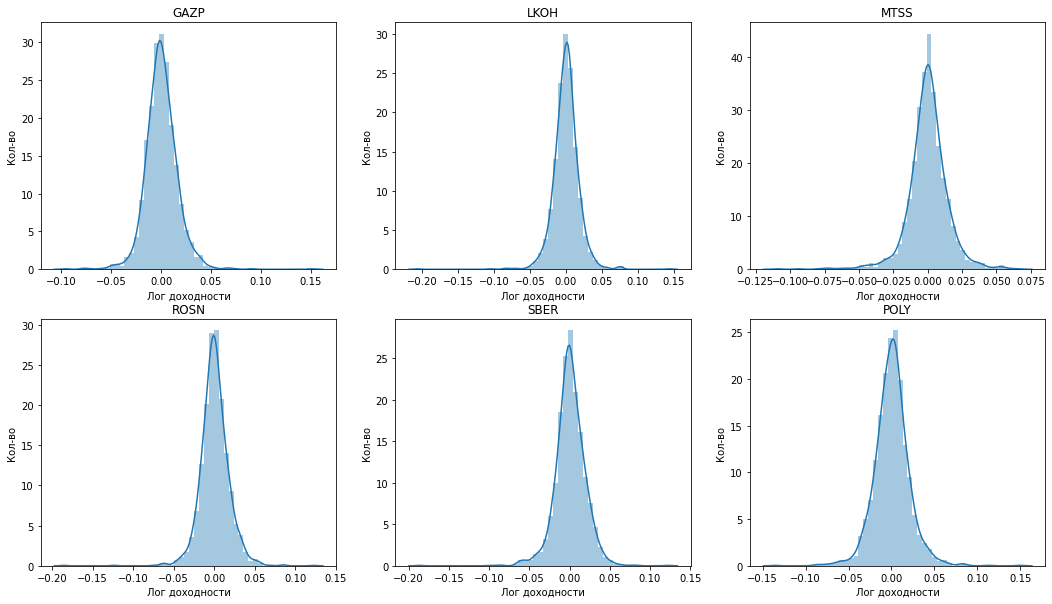

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вывод графиков
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.distplot(df_all[0]['<LOG>'])
plt.title(df_all[0]['<TICKER>'][0])
plt.xlabel('Лог доходности')
plt.ylabel('Кол-во')

plt.subplot(2, 3, 2)
sns.distplot(df_all[1]['<LOG>'])
plt.title(df_all[1]['<TICKER>'][0])
plt.xlabel('Лог доходности')
plt.ylabel('Кол-во')

plt.subplot(2, 3, 3)
sns.distplot(df_all[2]['<LOG>'])
plt.title(df_all[2]['<TICKER>'][0])
plt.xlabel('Лог доходности')
plt.ylabel('Кол-во')

plt.subplot(2, 3, 4)
sns.distplot(df_all[3]['<LOG>'])
plt.title(df_all[3]['<TICKER>'][0])
plt.xlabel('Лог доходности')
plt.ylabel('Кол-во')

plt.subplot(2, 3, 5)
sns.distplot(df_all[4]['<LOG>'])
plt.title(df_all[4]['<TICKER>'][0])
plt.xlabel('Лог доходности')
plt.ylabel('Кол-во')

plt.subplot(2, 3, 6)
sns.distplot(df_all[5]['<LOG>'])
plt.title(df_all[5]['<TICKER>'][0])
plt.xlabel('Лог доходности')
plt.ylabel('Кол-во')


plt.show()

In [21]:
#Проверка нормальности распределения лог дох встроенными функциями для всех компаний:
import scipy.stats as stats

for df in df_all:
    z, pval = stats.normaltest(df['<LOG>'])   #z-хи-статистика pval-р-значение

    if(pval < 0.055):          
        print ('Логарифмическая доходность не подчиняется нормальному распределению. Компания: ', df['<TICKER>'][0])
    else:
        print('Логарифмическая доходность подчиняется нормальному распределению. Компания: ', df['<TICKER>'][0])

Логарифмическая доходность подчиняется нормальному распределению. Компания:  GAZP
Логарифмическая доходность подчиняется нормальному распределению. Компания:  LKOH
Логарифмическая доходность подчиняется нормальному распределению. Компания:  MTSS
Логарифмическая доходность подчиняется нормальному распределению. Компания:  ROSN
Логарифмическая доходность подчиняется нормальному распределению. Компания:  SBER
Логарифмическая доходность подчиняется нормальному распределению. Компания:  POLY


In [22]:
#Проверка равенства дисперсий
#Сгруппируем логарифмичсекие доходности по дням недели для каждой компании
list_all_weekday = []
for df in df_all:
    company = []
    company.append(df['<LOG>'][1:][df['<WEEKDAY>'] == 'Monday'].tolist())
    company.append(df['<LOG>'][1:][df['<WEEKDAY>'] == 'Tuesday'].tolist())
    company.append(df['<LOG>'][1:][df['<WEEKDAY>'] == 'Wednesday'].tolist())
    company.append(df['<LOG>'][1:][df['<WEEKDAY>'] == 'Thursday'].tolist())
    company.append(df['<LOG>'][1:][df['<WEEKDAY>'] == 'Friday'].tolist())
    list_all_weekday.append(company)
#Сравним дисперсии
for i, company in enumerate(list_all_weekday):
    stat, p = stats.levene(*company)
    print(df_all[i]['<TICKER>'][0], ': P-value = ', p)

GAZP : P-value =  0.3869258906264671
LKOH : P-value =  0.7367677406745501
MTSS : P-value =  0.15173448841190956
ROSN : P-value =  0.8750462049353042
SBER : P-value =  0.9576445475194263
POLY : P-value =  0.09826518944053031


### Дисперсионный анализ

In [23]:
#ANOVA
for i, company in enumerate(list_all_weekday):
    stat, p = stats.f_oneway(*company)
    print(df_all[i]['<TICKER>'][0], ': P-value = ', p)

GAZP : P-value =  0.02937224835475284
LKOH : P-value =  0.5849850673892515
MTSS : P-value =  0.6205530784466645
ROSN : P-value =  0.1208806555171869
SBER : P-value =  0.26750990575838435
POLY : P-value =  0.32991907311487917


In [24]:
#Проведем апостериорный анализ с помощью теста Tukey HSD (Honest Significant Difference)
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison 
multiComp = MultiComparison(df_all[0][1:]['<LOG>'], df_all[0][1:]['<WEEKDAY>']) 
tukeyres = multiComp.tukeyhsd(alpha = 0.05) 
 
print(tukeyres) 
print('Компания: ', df_all[0]['<TICKER>'][0]) 
print('Дни недели: ', multiComp.groupsunique)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower  upper  reject
--------------------------------------------------------
  Friday    Monday   0.0012    0.9 -0.0022 0.0047  False
  Friday  Saturday   0.0017    0.9 -0.0189 0.0224  False
  Friday  Thursday  -0.0003    0.9 -0.0038 0.0031  False
  Friday   Tuesday   0.0033 0.0767 -0.0002 0.0067  False
  Friday Wednesday   0.0011    0.9 -0.0024 0.0045  False
  Monday  Saturday   0.0005    0.9 -0.0201 0.0212  False
  Monday  Thursday  -0.0015 0.7756  -0.005 0.0019  False
  Monday   Tuesday    0.002 0.5477 -0.0014 0.0055  False
  Monday Wednesday  -0.0002    0.9 -0.0036 0.0033  False
Saturday  Thursday  -0.0021    0.9 -0.0227 0.0186  False
Saturday   Tuesday   0.0015    0.9 -0.0191 0.0221  False
Saturday Wednesday  -0.0007    0.9 -0.0213   0.02  False
Thursday   Tuesday   0.0036 0.0364  0.0001  0.007   True
Thursday Wednesday   0.0014 0.8476 -0.0021 0.0048  False
 Tuesday Wednesday  -0.0022 0.4

In [25]:
#Проведем апостериорный анализ с помощью теста Tukey HSD (Honest Significant Difference)
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
for df in df_all[1:]:
    multiComp = MultiComparison(df[1:]['<LOG>'], df[1:]['<WEEKDAY>']) 
    tukeyres = multiComp.tukeyhsd(alpha = 0.05) 

    print(tukeyres)
    print('Компания: ', df['<TICKER>'][0])
    print('Дни недели: ', multiComp.groupsunique)
    print('---------------------------------------------------------------------------------------')

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower  upper  reject
--------------------------------------------------------
  Friday    Monday  -0.0006    0.9 -0.0045 0.0032  False
  Friday  Saturday  -0.0002    0.9 -0.0232 0.0228  False
  Friday  Thursday   0.0008    0.9  -0.003 0.0046  False
  Friday   Tuesday   0.0015 0.8832 -0.0024 0.0053  False
  Friday Wednesday   0.0007    0.9 -0.0031 0.0045  False
  Monday  Saturday   0.0004    0.9 -0.0225 0.0234  False
  Monday  Thursday   0.0015  0.884 -0.0024 0.0053  False
  Monday   Tuesday   0.0021 0.6125 -0.0018  0.006  False
  Monday Wednesday   0.0013    0.9 -0.0025 0.0052  False
Saturday  Thursday    0.001    0.9 -0.0219  0.024  False
Saturday   Tuesday   0.0017    0.9 -0.0213 0.0246  False
Saturday Wednesday   0.0009    0.9 -0.0221 0.0239  False
Thursday   Tuesday   0.0006    0.9 -0.0032 0.0045  False
Thursday Wednesday  -0.0001    0.9  -0.004 0.0037  False
 Tuesday Wednesday  -0.0008    

### Модельные данные

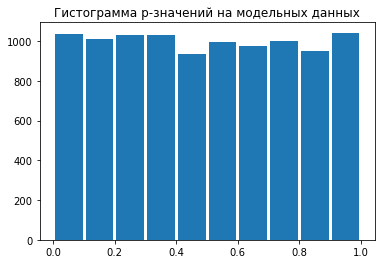

In [26]:
n = 10000    #Кол-во раз вычисления статистики
sample = 340   #Объем выборки из нормального распределения

p_val = []
W = []
for i in range(n):
    x = [np.random.normal(loc = 0, scale = 1, size = sample) for _ in range(5)]
    rez = stats.f_oneway(*x)
    W.append(rez[0])
    p_val.append(rez[1])


plt.hist(p_val, rwidth = 0.9)
plt.title('Гистограмма p-значений на модельных данных')
plt.show()

In [27]:
#Проверка р-значений на равномерность распределения
from scipy.stats import kstest

kstest(p_val, 'uniform')

KstestResult(statistic=0.010450727827467643, pvalue=0.22322495719204172)

In [28]:
#Расчет мощности критерия (ANOVA)
#Составим таблицу квантилей
q999 = np.linspace(0.001, 0.999, 999)
emp999 = pd.DataFrame(W, columns=['qs_emp']).quantile(q999)

emp999

,qs_emp
0.001,0.023897
0.002,0.036074
0.003,0.040408
0.004,0.049289
0.005,0.054385
...,...
0.995,3.785451
0.996,3.924670
0.997,4.073042
0.998,4.270082


In [29]:
from statsmodels.distributions.empirical_distribution import ECDF
quant = ECDF(list(emp999['qs_emp']))
print(quant(0.002))
n = 10000   #кол-во экспериментов
sample = 340   #объем выборки
for i in range(n):
    x = [np.random.normal(loc = 0, scale = 1, size = sample) for _ in range(5)] # Генерация случайной выборки
    pw = stats.f_oneway(*x) # Применение критерия для сгенерированной выборки
    p.append(1 - quant(pw[0]))

ecdf_p = ECDF(p)
power = pd.DataFrame() # Таблица мощностей

power['0.005'] = [ecdf_p(0.005)] # Мощность при 0.5%
power['0.01'] = [ecdf_p(0.01)] # Мощность при 1%
power['0.05'] = [ecdf_p(0.05)] # Мощность при 5%
power['0.2'] = [ecdf_p(0.2)] # Мощность при 20%
print(power)

0.0


AttributeError: 'numpy.float64' object has no attribute 'append'

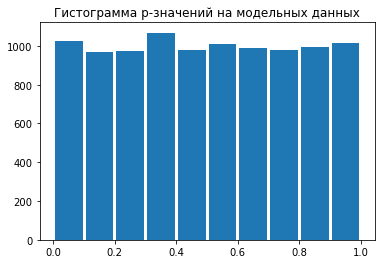

In [32]:
n = 10000    #Кол-во раз вычисления статистики
sample = 340   #Объем выборки из нормального распределения

p_val = []
W = []
for i in range(n):
    x = [np.random.normal(loc = 0, scale = 1, size = sample) for _ in range(5)]
    rez = stats.f_oneway(*x)
    W.append(rez[0])
    p_val.append(rez[1])


plt.hist(p_val, rwidth = 0.9)
plt.title('Гистограмма p-значений на модельных данных')
plt.show()

In [33]:
#Расчет мощности критерия (ANOVA)
#Составим таблицу квантилей
q999 = np.linspace(0.001, 0.999, 999)
emp999 = pd.DataFrame(W, columns=['qs_emp']).quantile(q999)

emp999

,qs_emp
0.001,0.024660
0.002,0.033788
0.003,0.039043
0.004,0.041955
0.005,0.048274
...,...
0.995,3.715558
0.996,3.780055
0.997,3.979962
0.998,4.297475


In [37]:
from statsmodels.distributions.empirical_distribution import ECDF
quant = ECDF(list(emp999['qs_emp']))

p = []
n = 10000   #кол-во экспериментов
sample = 340   #объем выборки
for i in range(n):
    x = [np.random.normal(loc = 0, scale = 1, size = sample), 
         np.random.normal(loc = 0.1, scale = 1, size = sample)] # Генерация случайной выборки
    pw = stats.f_oneway(*x) # Применение критерия для сгенерированной выборки
    p.append(1 - quant(pw[0]))

ecdf_p = ECDF(p)
power = pd.DataFrame() # Таблица мощностей

power['0.005'] = [ecdf_p(0.005)] # Мощность при 0.5%
power['0.01'] = [ecdf_p(0.01)] # Мощность при 1%
power['0.05'] = [ecdf_p(0.05)] # Мощность при 5%
power['0.2'] = [ecdf_p(0.2)] # Мощность при 20%
print(power)

    0.005    0.01    0.05     0.2
0  0.2652  0.2964  0.3994  0.5328


In [36]:
from statsmodels.distributions.empirical_distribution import ECDF
quant = ECDF(list(emp999['qs_emp']))

p = []
n = 10000   #кол-во экспериментов
sample = 340   #объем выборки
for i in range(n):
    x = [np.random.normal(loc = 0, scale = 1, size = sample), 
         np.random.normal(loc = 0.1, scale = 1, size = sample), 
         np.random.normal(loc = 0.15, scale = 1, size = sample)] # Генерация случайной выборки
    pw = stats.f_oneway(*x) # Применение критерия для сгенерированной выборки
    p.append(1 - quant(pw[0]))

ecdf_p = ECDF(p)
power = pd.DataFrame() # Таблица мощностей

power['0.005'] = [ecdf_p(0.005)] # Мощность при 0.5%
power['0.01'] = [ecdf_p(0.01)] # Мощность при 1%
power['0.05'] = [ecdf_p(0.05)] # Мощность при 5%
power['0.2'] = [ecdf_p(0.2)] # Мощность при 20%
print(power)

    0.005    0.01    0.05     0.2
0  0.3012  0.3554  0.5192  0.7138
